<a href="https://colab.research.google.com/github/BruninBr15/Data-Analysis-Python/blob/main/Candlestick_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [25]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fecha_Ajuste', 'Volume']

In [26]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fecha_Ajuste,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


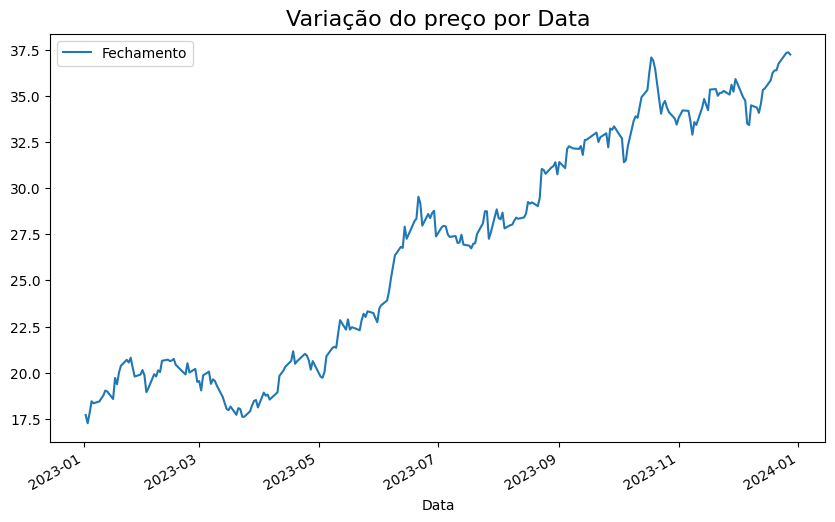

In [27]:
dados['Fecha_Ajuste'].plot(figsize=(10,6))
plt.title('Variação do preço por Data', fontsize=16)
plt.legend(['Fechamento'])

In [29]:
df = dados.head(60).copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fecha_Ajuste,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613497,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030733,58130000,19369.0


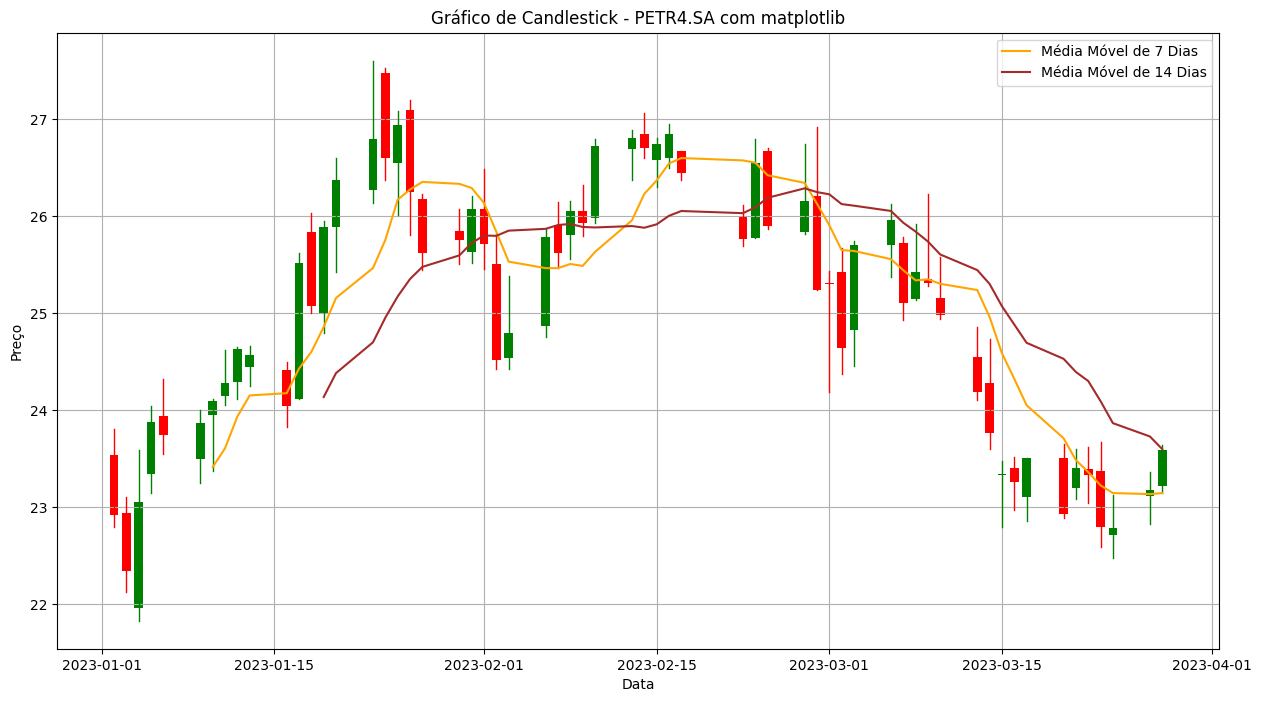

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))

width = 0.7

for i in range(len(df)):

  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
    color = 'green'
  else:
    color = 'red'

  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color=color,
          linewidth=1)

  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2 , min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                              width,
                              abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                              facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel de 7 Dias')
ax.plot(df['Data'], df['MA14'], color='brown', label='Média Móvel de 14 Dias')

ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Gráfico de Candlestick - PETR4.SA com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()

In [44]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=(0.2, 0.7))

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
              row=1, col=1)

fig.add_trace(go.Bar(x=df.index,
                         y=df['Volume'],
                         name='Volume'),
              row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,
                  width=1100, height=600)

fig.show()

In [45]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


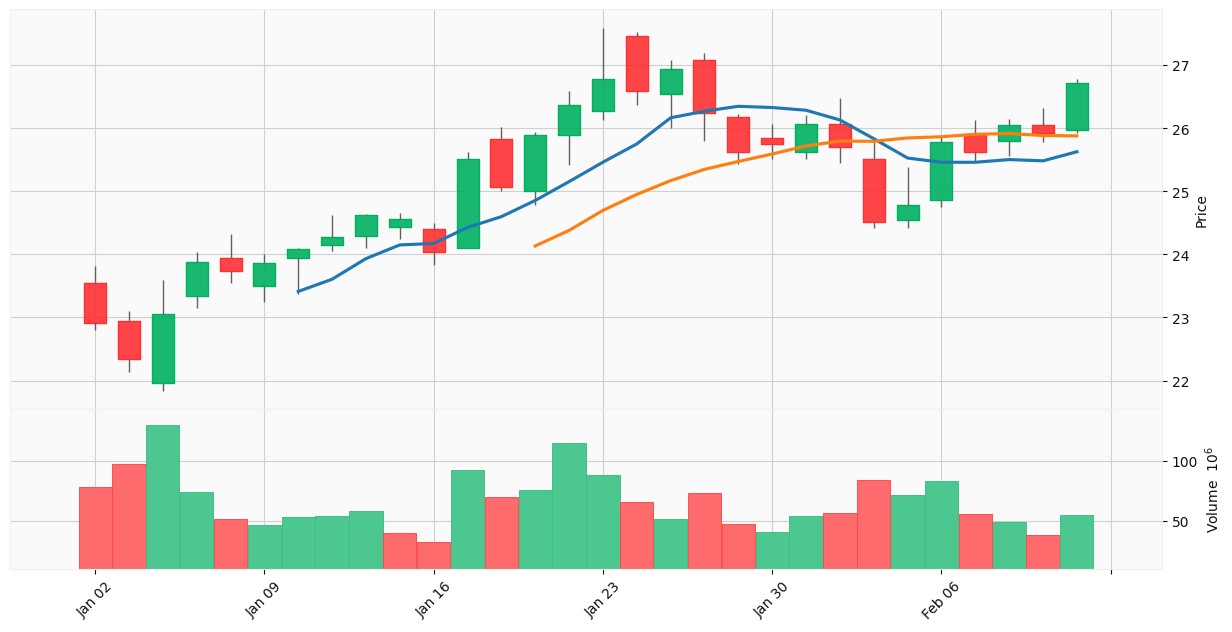

In [50]:
mpf.plot(dados.head(30), type='candle', figsize=(16, 8), volume=True, mav=(7, 14), style='yahoo')